In [44]:
import plotly.graph_objects as go
import numpy as np
import xarray as xr
import os

In [45]:
filename = "3D_channel_nostrat"

os.system("julia --project=.. grid_jld2_to_feather.jl "+filename)

The latest version of Julia in the `release` channel is 1.10.1+0.x64.linux.gnu. You currently have `1.10.0+0.x64.linux.gnu` installed. Run:

  juliaup update

to install Julia 1.10.1+0.x64.linux.gnu and update the `release` channel to that version.


0

In [53]:
os.system("python grid_feather_to_nc.py "+filename)

0

In [47]:
datapath = "data/"
ds = xr.open_dataset(datapath+filename+".nc")
ds

<xarray.Dataset>
Dimensions:  (x: 10, y: 512)
Coordinates:
  * x        (x) float64 1e+03 3e+03 5e+03 7e+03 ... 1.5e+04 1.7e+04 1.9e+04
  * y        (y) float64 1e+03 3e+03 5e+03 ... 1.019e+06 1.021e+06 1.023e+06
Data variables:
    h        (x, y) float64 ...

In [54]:
x = ds.x
y = ds.y

X, Y = np.meshgrid(x, y)
Z = ds.h.values.T

In [55]:
fig = go.Figure(data=[go.Surface(x=X, y=Y,z=Z)])
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))


fig.update_layout(title='Test', 
                  #autosize=False,
                  template="plotly_dark",
                  scene=dict(
        xaxis=dict(range=[min(x), max(x)]),  # Setting range for x-axis
        yaxis=dict(range=[min(y), max(y)]),  # Setting range for y-axis; adjust this as needed
        zaxis=dict(range=[min(Z.flatten()), 0])  # Setting range for z-axis
    )
)


Text(0, 0.5, 'y')

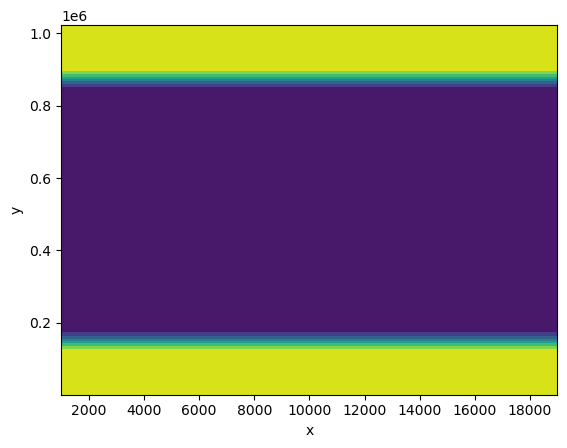

In [56]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.contourf(X, Y, Z)
ax.set_xlabel("x")
ax.set_ylabel("y")